In [1]:
# Importing the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the csv files

artists = pd.read_csv('recatoma_artists.csv')
albums = pd.read_csv('recatoma_albums.csv')

In [3]:
# Visualizing artists DataFrames shape
print(artists.shape)

# Visualizing the artists DataFrame (DF)
artists.head()

(922, 4)


,playcount,name,tags,similar_artists
0,189,Caetano Veloso,"mpb, brazilian, Bossa Nova, tropicalia, brasil","Gilberto Gil, Gal Costa, Maria Bethânia, Chico..."
1,131,David Bowie,"rock, glam rock, classic rock, 80s, alternative","Tin Machine, Lou Reed, Iggy Pop, Roxy Music, T..."
2,122,Watson,"seen live, Grime, indie, rock, punk","Club Silêncio, J-Sweet, Blazin Beats, Kosha, R..."
3,102,Kinky,"rock, alternative, electronic, mexico, latin","Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega, ..."
4,99,Feist,"female vocalists, indie, singer-songwriter, Ca...","Cat Power, Broken Social Scene, Laura Marling,..."


In [16]:
# Renaming the column 'name' from the artists DF
artists.rename(columns={'name': 'artist'}, inplace=True)

# Checking the renamed column
artists.head()

,playcount,artist,tags,similar_artists
0,189,Caetano Veloso,"mpb, brazilian, Bossa Nova, tropicalia, brasil","Gilberto Gil, Gal Costa, Maria Bethânia, Chico..."
1,131,David Bowie,"rock, glam rock, classic rock, 80s, alternative","Tin Machine, Lou Reed, Iggy Pop, Roxy Music, T..."
2,122,Watson,"seen live, Grime, indie, rock, punk","Club Silêncio, J-Sweet, Blazin Beats, Kosha, R..."
3,102,Kinky,"rock, alternative, electronic, mexico, latin","Plastilina Mosh, Zoé, Jumbo, La Gusana Ciega, ..."
4,99,Feist,"female vocalists, indie, singer-songwriter, Ca...","Cat Power, Broken Social Scene, Laura Marling,..."


In [4]:
# Visualizing albums DF shape
print(albums.shape)

# Visualizing the albums DF
albums.head()

(1210, 4)


,playcount,name,artists,tags
0,72,Sky Blue Sky,Wilco,"albums I own, best of 2007, indie, 2007, favor..."
1,60,The United States of America,The United States of America,"psychedelic, 60s, experimental, 1968, Psychede..."
2,57,Widow City,The Fiery Furnaces,"albums I own, indie, american, 00s, best of 2007"
3,55,Mind Bomb,The The,"1989, alternative, 80s, johnny marr, never stale"
4,53,Let It Die,Feist,"albums I own, female vocalists, favorite album..."


In [17]:
# Renaming the column 'name' from the artists DF
albums.rename(columns={'name':'album', 'artists':'artist'}, inplace=True)

# Checking the renamed column
albums.head()

,playcount,album,artist,tags
0,72,Sky Blue Sky,Wilco,"albums I own, best of 2007, indie, 2007, favor..."
1,60,The United States of America,The United States of America,"psychedelic, 60s, experimental, 1968, Psychede..."
2,57,Widow City,The Fiery Furnaces,"albums I own, indie, american, 00s, best of 2007"
3,55,Mind Bomb,The The,"1989, alternative, 80s, johnny marr, never stale"
4,53,Let It Die,Feist,"albums I own, female vocalists, favorite album..."


In [39]:
# Creating a new DataFrame to check the number of albums per artists and the playcount  
total_albums = albums.groupby('artist')['playcount'].agg(['count', 'sum'])

# Reseting the index
total_albums.reset_index(inplace=True)

# Renaming columns
total_albums.rename(columns={'count':'albums',  'sum':'playcount'}, inplace=True)

# Sorting values by albums 
total_albums.sort_values(by='albums', ascending=False, inplace=True)

# Looking at the top 10 
total_albums.head(10)

,artist,albums,playcount
103,Caetano Veloso,21,135
87,Bob Dylan,18,66
522,Pink Floyd,15,35
732,Various Artists,13,33
174,Depeche Mode,13,79
680,The Rolling Stones,11,64
164,David Bowie,10,124
143,Cocteau Twins,9,41
641,The Cure,9,41
649,The Fiery Furnaces,8,70


[Text(0, 0, 'Caetano Veloso'),
 Text(0, 0, 'Bob Dylan'),
 Text(0, 0, 'Pink Floyd'),
 Text(0, 0, 'Various Artists'),
 Text(0, 0, 'Depeche Mode'),
 Text(0, 0, 'The Rolling Stones'),
 Text(0, 0, 'David Bowie'),
 Text(0, 0, 'Cocteau Twins'),
 Text(0, 0, 'The Cure'),
 Text(0, 0, 'The Fiery Furnaces'),
 Text(0, 0, 'Radiohead'),
 Text(0, 0, 'Neil Young'),
 Text(0, 0, 'Cat Power'),
 Text(0, 0, 'Miles Davis'),
 Text(0, 0, 'Gilberto Gil'),
 Text(0, 0, 'Wilco'),
 Text(0, 0, "2 Many DJ's"),
 Text(0, 0, 'The Beatles'),
 Text(0, 0, 'Red Hot Chili Peppers'),
 Text(0, 0, 'St. Vincent'),
 Text(0, 0, 'Sonic Youth')]

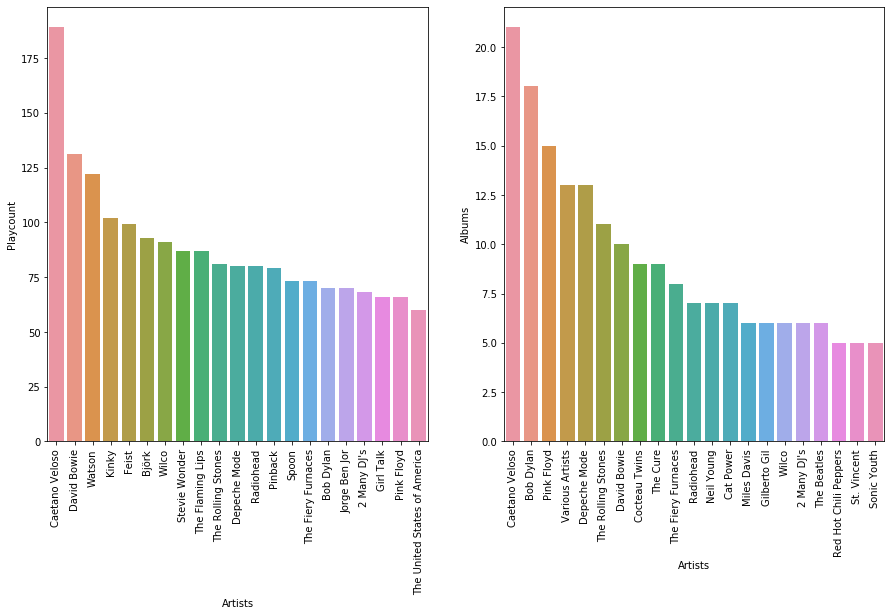

In [42]:
# Comparing the playcounts from the albums and artist DF 

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
g = sns.barplot(x=artists['artist'].iloc[0:21],
           y=artists['playcount'].iloc[0:21],
           data = artists)
plt.xlabel('Artists')
plt.ylabel('Playcount')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
h = sns.barplot(x=total_albums['artist'].iloc[0:21],
           y=total_albums['albums'].iloc[0:21],
           data = total_albums)
plt.xlabel('Artists')
plt.ylabel('Albums')
h.set_xticklabels(h.get_xticklabels(), rotation=90)



In [22]:
artists.loc[:,['artist','playcount']].head(10)

,artist,playcount
0,Caetano Veloso,189
1,David Bowie,131
2,Watson,122
3,Kinky,102
4,Feist,99
5,Björk,93
6,Wilco,91
7,Stevie Wonder,87
8,The Flaming Lips,87
9,The Rolling Stones,81
